CNN computes feature maps from an input image

* Sparse connectivity: different with MLPs which connecting to the whole picture, local receptive field is connected to only a small patch of pixels
* Parameter sharing: The same weights are used for different pathes of the input image

CNNs are composed of
* convolutional
* subsampling layers (pooling layers)
    * do not have any learnable parameters (no weight or bias)

but both convolutional and fully connected layers have weights and biases

A discrete convolution (or simply convolution)

    y = x * w

* x: input or signal
* w: filter of kernel

$ y = x* w \rightarrow y[i] = \sum_{k=-\infty}^{+\infty} x[i-k]w[k]
$



padding mode
* full padding: p = feature - 1, usually used in signal processing which is important to minimize boundary effect
* same padding: output vector size = input vector, computed by the filter size
* valid padding: p = 0 (no padding)

the convolution output
$ o = \frac{n+2p-m}{s}+1$
* input vector size = n
* filter size = m
* padding size = p

In [2]:
import numpy as np

def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int(len(x_padded) - len(w_rot)) + 1, s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]
print(conv1d(x, w, p=2, s=1))

print('numpy', np.convolve(x, w, mode='same'))

[ 5. 14. 16. 26. 24. 34. 19. 22.]
numpy [ 5 14 16 26 24 34 19 22]


just think conv1d as simple

x = [1, 3, 2]

w = [1, 0] -> rotate [0, 1]

p = 1

x becomse [0, 1, 3, 2]

starts with multiply 0 * 0 + 1 * 1 and move w window up to x[-1] meets w[-1]

2d conv is simple

* same as 1d but consider height of w
* pad will be added vertically as well as horizontally

One aspect is that the filter matrix is actually not rotated in most tools like PyTorch

* use Fourier transform for efficiency
* usually kernel size is smaller than the size in the input image
    * 1x1, 3x3, 5x5

#### Subsampling layers

* max pooling
    * local invariance: small changes in a local do not change the result of max-pooling
* mean pooling

Pooling decreases the size of features, which results in higher computational efficiency

Normally pooilng is not overlapping

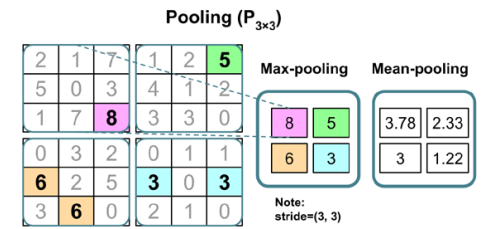

#### Putting everything together - implementing a CNN

in MLP, z = Wx + b is replaced with Z= W * X + b in CNN

X is height x width arrangement

Working with color channels

* RGB color mode, X = $N_1 \times N_2 \times C_{in} \quad C_{in}=$ color channels in RGB
* Conventional impementation of convolutional layer expects a rank-3 tensor
* with torchvision, input and output image tensors are in the format of Tensor[channels, image_height, image_width]

**how we incoporate multiple input channels in the convolution operation?**

1. perform the convolution operation for each channels
2. add the results together using matrix summation

The convolution associated with each channel (c) has its own kenrel matrix as W[:, :, c]

Usually, CNN has more than one feature map

then the kernel tensor becomes: $ width \times height \times C_{in} \times C_{out}$

Note that Kernel has $ C_{in} $ counts of matrix
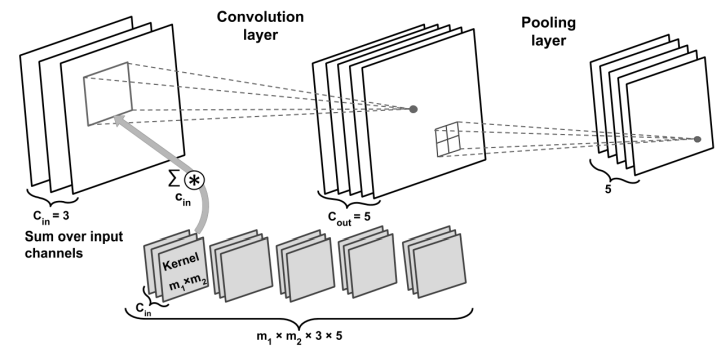

Regularizing an NN with L2 regularization and dropout

do well on training dataset, then to prevent overfitting, apply one or multiple regularization schemes to achieve good generalization performance

Besides L1 and L2, dropout has emerged as a popular technique to prevent overfitting

* a fraction of the hidden units is randomly dropped at every iteration with probability $ p_{drop} $($ p_{keep} = 1-p_{drop}$)

Loss function
* BCELoss(Binary cross-entropy) or BCEWithLogitLoss: Binary classification
* NLLLoss or CrossEntropyLoss: multiclass classification

The multilayer CNN architecture

Input is gray (channel=1), conv stride=1, kernel_size=2
* Input: [batchsize x 28 x 28 x 1]
* Conv_1: [batchsize x 28 x 28 x 32]
* Pooling_1: [batchsize x 14 x 14 x 32]
* Conv_2: [batchsize x 14 x 14 x 64]
* Pooling_2: [batchsize x 7 x 7 x 64]
* FC_1: [batchsize x 1024]
* FC_2 and softmax layer: [batchsize x 1]

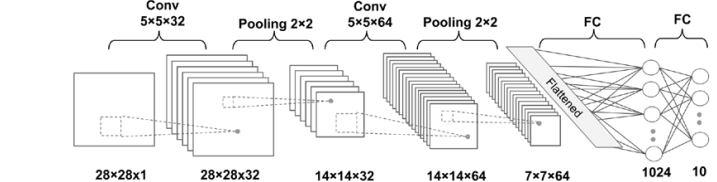